In [1]:
%matplotlib inline
import os
import math 
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import random
from scipy.stats import pearsonr
sns.set_style('white')

ahba_dir     = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/SEPT10/AHBA'
#ahba_dir     = '/scr/malta3/workspace/project_iron/AHBA'
save_fig_dir = '/Users/kanaan/Google Drive/TS-EUROTRAIN/Papers/2016_QSM_paper/Figures_python_v2'


drop_strings = ['coords_native', 'donor_names', 'struct_id', 
                'struct_name', 'top_struct', 'Mean', 'Median', 
                'PC1', 'PC2','PC3', 'corrected_mni_x', 'corrected_mni_y', 
                'corrected_mni_z']

# Geneset contents

In [5]:
##################################################################################################
# Genesets 
##################################################################################################

GS_IRON_H   = ['FTH1','FTL' ,'HFE','HFE2','IL1A', 'IL6', 'IL6R','IREB2','SLC40A1','TF','TFR2','TNF',]
GS_IRON_D = ['THRSP', 'TF', 'MAL', 'KLK6', 'HOMER1', 'MOBP', 'APOD', 'MOG', 'CRYAB', 'APOC1', 'CA2', 'RASGRP1', 
          'STMN4', 'LYZ','GSTM1', 'CTSS',  'DCK' ]

GS_IRON_IH = ['ABCB6', 'ABCB7', 'ABCG2', 'ACO1', 'ALAS2', 'BMP6', 'CP', 'CYBRD1',  'FLVCR1', 'FTH1',  'FTHL17',
                'FTL', 'FTMT', 'FXN', 'GDF2', 'HAMP', 'HEPH', 'HFE', 'HFE2', 'HIF1A', 'HMOX1', 'HMOX2', 'HPX', 'IREB2', 'ISCU', 'LCN2',
                'LTF', 'MYC', 'NDFIP1', 'NUBP1', 'SCARA5', 'SLC11A1', 'SLC11A2', 'SLC22A17', 'SLC40A1', 'SLC46A1', 'SMAD4', 'SOD1',
                'SRI', 'TF', 'TFR2', 'TFRC', 'TMPRSS6', 'TTC7A']

GS_IRON_IM = ['HFE', 'MFI2', 'PICALM', 'SLC11A2', 'STEAP1', 'STEAP1B', 'STEAP2', 'STEAP3', 'STEAP4', 'TF', 
              'TFR2', 'TFRC']

GS_IRON_T1 = ['ABCB6', 'ABCB7', 'ABCG2', 'FLVCR1', 'FLVCR2', 'HPX', 'HRG', 'LCN2',
                   'SLC22A17', 'SLC46A1', 'SLC48A1']
GS_IRON_T2 = ['ABCG2', 'ATP6V0A2', 'ATP6V0A4', 'ATP6V0B', 'ATP6V0C', 'ATP6V0D1', 'ATP6V0D2', 'ATP6V0E1', 'ATP6V1A',
              'ATP6V1B1', 'ATP6V1B2', 'ATP6V1C1', 'ATP6V1C2', 'ATP6V1D', 'ATP6V1E1', 'ATP6V1E2', 'ATP6V1F', 'ATP6V1G1',
              'ATP6V1G2', 'ATP6V1G3', 'ATP6V1H', 'CP', 'CYBRD1', 'FLVCR1', 'FTH1', 'FTL', 'HEPH', 'HMOX1', 'HMOX2',
              'MCOLN1', 'SLC40A1', 'SLC46A1', 'STEAP3', 'TCIRG1', 'TF', 'TFRC']

GS_IRON_R = ['ABAT', 'ABCG2', 'ACO1', 'ALAD', 'APBB1', 'ATP7A', 'B2M', 'BCL2', 'BMP6', 'C1QA', 'CCNB1', 'CCND1',
             'CPOX', 'CYBRD1', 'CYP1A1', 'DRD2', 'FXN', 'GSK3B', 'HAMP', 'HFE', 'HMOX1', 'LCT', 'MDM2', 'PAWR',
             'PDX1', 'SLC11A2', 'SLC40A1', 'SLC6A3', 'SNCA', 'TF', 'TFAP2A', 'TFF1', 'TFR2', 'TFRC', 'UROD']



GS_DA     = ['COMT', 'DDC', 'MAOA', 'MAOB', 'NQO1', 'PPP2CA', 'PPP2CB', 'PRKACA', 'PRKACB','PRKACG', 'TH', 'TYR']
GS_DA_receptor_bind = ['GNA13', 'DLG4', 'DNM1', 'DNM2','DRD1', 'DRD3','GNA12','GNAS',  'ARRB2', 'ATP1A3', 'PALM', 
                    'CLIC6', 'PTPN11', 'PPP1R1B', 'DNAJC14', 'CAV2', 'SLC9A3R1']
GS_DA_receptor_sig  = ['ADCY5', 'ADCY6', 'ARRB2', 'CALY','DRD1', 'DRD2', 'DRD3', 'DRD4', 'DRD5', 'FLNA', 
                   'GNA11', 'GNA14', 'GNA15', 'GNAI3', 'GNAL', 'GNAO1', 'GNAQ', 'GNAS', 'GNB1', 'GNG2', 
                   'GPR21', 'GPR52', 'GSK3A', 'GSK3B', 'HMP19', 'KLF16', 'OPRM1', 'RGS9', 'SLC9A3R1']
GS_DA_transport     = ['CHRM5','DRD1','PARK2','PARK7','SLC18A2','SLC22A1','SLC22A2','SLC22A3', 'SLC6A2',
                    'SLC6A3','SNCA']
GS_DA_transmission  = ['CDK5','CRH','CRHBP','DRD1','DRD2','DRD3','DRD4','DRD5','RASD2','TH']
GS_ANMC = ['ME1', 'ALDH5A1', 'GBE1', 'GALM', 'PYGL', 'CPS1','PFKFB3', 'PYGB', 'IDH2', 'ENO1','PPP1R1A', 
        'MDH2', 'CS','PYGM', 'PGM3', 'PHKG1', 'SLC3A2', 'PFKFB4', 'KHK','LDHB', 'PCK2','SLC2A8',  'PGM2', 
        'GPT','AKR1B1', 'NANS', 'PDK4','OGDHL','DHTKD1', 'PFKM', 'PGM1', 'PC','AGL']
GS_GLU  = ['UNC13B', 'RIMS1', 'GLS2', 'GLS', 'SLC38A2', 'SLC17A7', 'RAB3A', 'SLC1A1', 'SLC1A6', 'SLC1A7', 
        'SNAP25', 'STX1A', 'STXBP1','VAMP2', 'SYT1' ]
GS_GABA = ['GPHN', 'GABARAP','DNM1', 'GABRA1', 'GABRA2', 'GABRA3', 'GABRA4','GABRA5','GABRA6''SRC'] 
GS_GABA_GLU = GS_GLU + GS_GABA
GS_TF       = ['TF']
GS_FTH      = ['FTH1']
GS_FTL      = ['FTL']
GS_HRE      = ['HFE']
GS_HRE2     = ['HFE2']
GS_SLC25    = ['SLC25A37']
GS_SLC40    = ['SLC40A1']
GS_BIOBANK  = GS_TF + GS_FTH + GS_HRE + GS_SLC25
GS_FTH_ALL  = ['FTH1', 'FTH1P14', 'FTH1P20', 'FTHL17' ]
GS_FTL_ALL  = ['FTL', 'FTLP17']
GS_FERRITIN = GS_FTH_ALL + GS_FTL_ALL + ['FTMT']

GS_TCA = ['ACLY', 'ACO1', 'ACO2', 'CS', 'DLAT', 'DLD', 'DLST', 'FH', 'IDH1', 'IDH2', 'IDH3A', 'IDH3B',
      'IDH3G', 'LOC283398', 'LOC642502', 'MDH1', 'MDH2', 'OGDH', 'OGDHL', 'PC',  'PCK1',  'PCK2',
     'PDHA1', 'PDHA2', 'PDHB', 'SDHA', 'SDHB', 'SDHC', 'SDHD', 'SUCLA2', 'SUCLG1', 'SUCLG2']

GS_BTBD9 = ['BTBD9']
GS_ACO1 = ['ACO1']
GS_ACO2 = ['ACO2']
GS_ACO =  GS_ACO1+ GS_ACO2

# Grab expression dataframes

In [6]:
def return_expression_df(geneset):
    return pd.read_csv(os.path.join(ahba_dir, 'AHBA_%s.csv'%geneset),index_col=0)

IRON_H           = return_expression_df('IRON_HOMEOSTASIS_PCA')
IRON_D           = return_expression_df('IRON_D_PCA')
IRON_IH          = return_expression_df('IRON_ION_HOMEOSTASIS_PCA')
IRON_IM          = return_expression_df('IRON_ION_IMPORT_PCA')
IRON_IB          = return_expression_df('IRON_ION_BINDING_PCA')
IRON_T1          = return_expression_df('IRON_TRANSPORT1_PCA')
IRON_T2          = return_expression_df('IRON_TRANSPORT2_PCA')
IRON_R           = return_expression_df('IRON_RESPONSE_PCA')
ANMC             = return_expression_df('ANMC_PCA')
DA_met           = return_expression_df('DA_metabolism_PCA')
DA_receptor_sig  = return_expression_df('DA_receptor_sig_PCA')
DA_receptor_bind = return_expression_df('DA_receptor_PCA')
DA_transmission  = return_expression_df('DA_tranmission_PCA')
DA_transport     = return_expression_df('DA_transport_PCA')
ANMC             = return_expression_df('ANMC_PCA')
GLU              = return_expression_df('GLU_PCA')
GABA             = return_expression_df('GABA_PCA')
GLU_GABA         = return_expression_df('GLU_GABA_PCA')
FTH_ALL          = return_expression_df('FTH_ALL_PCA')
FERRITIN         = return_expression_df('FERRITIN_PCA')
FTL_ALL          = return_expression_df('FTL_ALL')
TF               = return_expression_df('TF')
FTH              = return_expression_df('FTH')
FTL              = return_expression_df('FTL')
HRE              = return_expression_df('HFE')
HRE2             = return_expression_df('HFE2')
SLC25            = return_expression_df('SLC25')
BIOBANK          = return_expression_df('BIOBANK_PCA')
BTBD9            = return_expression_df('BTBD9') 
TCA              = return_expression_df('TCA_PCA') 
ACO              = return_expression_df('ACO') 
ACO1             = return_expression_df('ACO1') 
ACO2             = return_expression_df('ACO2') 
HOUSEKEEPING     = return_expression_df('HOUSEKEEPING') 
HOUSEKEEPING_E   = return_expression_df('HOUSEKEEPING_EISENBERG') 

# Concatenate geneset expression values
*Contains values for expression (a) Mean, (b) PCA scores and (c) Truncated-SVD scores

In [7]:
def concat_dfs(measure):
    df  = pd.DataFrame(index = IRON_H.index, 
                        columns = ['IRON', 'IRON_D', 'DA_met', 'DA_receptor_bind', 'DA_receptor_sig', 
                                   'DA_transmission', 'DA_transport', 'ANMC', 'GLU', 'GABA', 'GLU_GABA', 
                                   'TF', 'FTH', 'FTL', 'HRE', 'HRE2', 'SLC25', 'SLC40', 'BIOBANK',
                                   'BTBD9', 'TCA', 'ACO','ACO1', 'ACO2', 'HOUSEKEEPING', 'HOUSEKEEPING_E',
                                   'top_struct', 'struct'])
    xval = 1
    df['top_struct']        = IRON_H.top_struct
    df['struct']            = IRON_H.struct_name
    df['IRON_H']            = IRON_H[measure] * xval
    df['IRON_D']            = IRON_D[measure]
    df['IRON_IH']           = IRON_IH[measure] * xval
    df['IRON_IM']           = IRON_IM[measure] * xval
    df['IRON_IB']           = IRON_IB[measure] * xval
    df['IRON_T1']           = IRON_T1[measure] * xval
    df['IRON_T2']           = IRON_T2[measure] * xval
    df['IRON_R']            = IRON_R[measure] * xval
    df['DA_met']            = DA_met[measure] * xval
    df['DA_receptor_bind']  = DA_receptor_bind[measure] * xval
    df['DA_receptor_sig']   = DA_receptor_sig[measure] * xval
    df['DA_transmission']   = DA_transmission[measure] * xval
    df['DA_transport']      = DA_transport[measure] * xval
    df['ANMC']              = ANMC[measure] * xval
    df['GLU']               = GLU[measure] * xval
    df['GABA']              = GABA[measure] * xval
    df['GLU_GABA']          = GLU_GABA[measure] * xval
    df['FTH_ALL']           = FTH_ALL[measure] * xval    
    df['FERRITIN']          = FERRITIN[measure] * xval    
    df['TCA']               = TCA[measure] * xval    
    if measure not in ['PC1', 'PC2', 'PC3', 'SVD1g','SVD2g', 'SVD3p', 'SVD1p','SVD2p', 'SVD3p']: 
        df['FTL_ALL']           = FTL_ALL[measure] * xval    
        df['TF']                = TF['TF'] * xval
        df['FTH']               = FTH['FTH1'] * xval
        df['FTH1P14']           = FERRITIN['FTH1P14'] * xval    
        df['FTH1P20']           = FERRITIN['FTH1P20'] * xval    
        df['FTHL17']            = FERRITIN['FTHL17'] * xval    
        df['FTL']               = FTL['FTL'] * xval
        df['HFE']               = HRE['HFE'] * xval
        df['HFE2']              = HRE2['HFE2'] * xval
        df['SLC25']             = SLC25['SLC25A37'] * xval
        df['BTBD9']             = BTBD9['BTBD9'] * xval
        df['ACO']               = ACO[measure] * xval
        df['ACO1']              = ACO1['ACO1'] * xval
        df['ACO2']              = ACO2['ACO2'] * xval
        df['BIOBANK']           = BIOBANK[measure] * xval
        df['HOUSEKEEPING']      = HOUSEKEEPING[measure] * xval
        df['HOUSEKEEPING_E']    = HOUSEKEEPING_E[measure] * xval
    return df

df_SVD1g  = concat_dfs('SVD1g')
df_SVD2g  = concat_dfs('SVD2g')
df_SVD1p  = concat_dfs('SVD1p')
df_SVD2p  = concat_dfs('SVD2p')
#df_SVD3  = concat_dfs('SVD3')
df_PC1   = concat_dfs('PC1')
df_PC2   = concat_dfs('PC2')
df_PC3   = concat_dfs('PC3')
df_MU    = concat_dfs('Mean')

# Restrict expression datframes to Subcortical structures

In [8]:
def extract_struct_expression(df, roi, struct):
    structures = set(df_MU[struct].values)
    drop_structs = [i for i in structures if roi not in i]
    df_roi = df[~df[struct].isin(drop_structs)]
    return df_roi

df_PC1_CAUD =  extract_struct_expression(df_PC1, 'caudate', 'struct')
df_PC1_PUTA =  extract_struct_expression(df_PC1, 'putamen', 'struct')
df_PC1_PALL =  extract_struct_expression(df_PC1, 'pallidus', 'struct')
df_PC1_STR  = pd.concat([df_PC1_CAUD,df_PC1_PUTA])
df_PC1_BG   = pd.concat([df_PC1_CAUD,df_PC1_PUTA, df_PC1_PALL])

df_PC2_CAUD =  extract_struct_expression(df_PC2, 'caudate', 'struct')
df_PC2_PUTA =  extract_struct_expression(df_PC2, 'putamen', 'struct')
df_PC2_PALL =  extract_struct_expression(df_PC2, 'pallidus', 'struct')
df_PC2_STR  = pd.concat([df_PC2_CAUD,df_PC2_PUTA])
df_PC2_BG   = pd.concat([df_PC2_CAUD,df_PC2_PUTA, df_PC2_PALL])

df_MU_CAUD =  extract_struct_expression(df_MU, 'caudate', 'struct')
df_MU_PUTA =  extract_struct_expression(df_MU, 'putamen', 'struct')
df_MU_PALL =  extract_struct_expression(df_MU, 'pallidus', 'struct')
df_MU_STR  = pd.concat([df_MU_CAUD,df_MU_PUTA])
df_MU_BG   = pd.concat([df_MU_CAUD,df_MU_PUTA, df_MU_PALL])


# Geneset correlations 

0.61 0.0


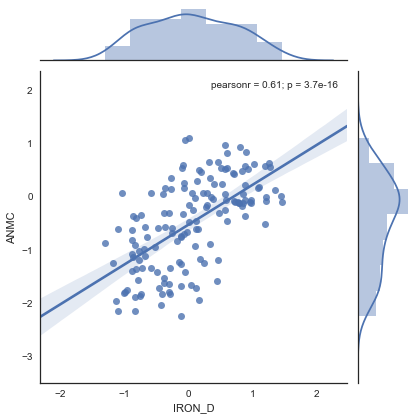

In [55]:
def detect_outlier_subjects(df,measure,m=2):
    upper = np.mean(df[measure]) + m * np.std(df[measure])
    lower = np.mean(df[measure]) - m * np.std(df[measure])
    outliers = []
    for subject in df.index:
        if df.loc[subject][measure] > upper:
            outliers.append(subject) 
        elif df.loc[subject][measure] < lower:
            outliers.append(subject) 
    #print outliers,measure
    return outliers

def make_corr(DF, met1,met2, color, annotate=0):
    dfx = pd.DataFrame(index=DF.index)
    dfx[met1]  = DF[met1] 
    dfx[met2]  = DF[met2]
    
    drop_met1 = detect_outlier_subjects(dfx,met1,m=2)
    drop_met2 = detect_outlier_subjects(dfx,met2,m=2)
    
    dfx = dfx.drop(drop_met2 + drop_met1,axis=0)
    r_val = np.round(pearsonr(dfx[met1], dfx[met2])[0],2)
    p_val = np.round(pearsonr(dfx[met1], dfx[met2])[1],10)
    
    sns.jointplot(dfx[met1], dfx[met2], kind = 'reg')
    
    print r_val, p_val
make_corr(df_PC1_STR, 'IRON_D','ANMC', 'r', annotate=0)


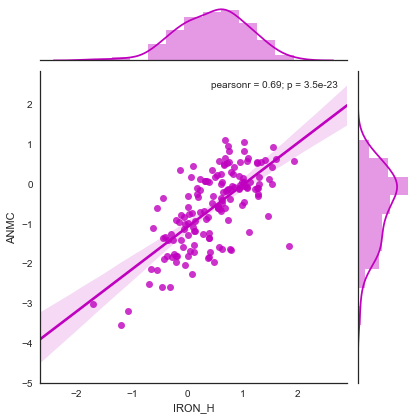

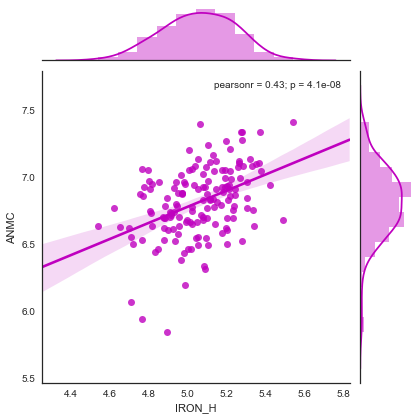

In [50]:
sns.jointplot(df_PC1_STR['IRON_H'], df_PC1_STR['ANMC'], kind = 'reg', color='m')
sns.jointplot(df_MU_STR['IRON_H'], df_MU_STR['ANMC'], kind = 'reg', color='m')

In [48]:
df_PC1_STR.to_csv('/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/AUG5/AHBA/AHBA_str.csv')

# Grab entire AHBA database (contains ~15000 annotated genes for now)
* Need to grab all data 20,737 genes 

In [248]:
# Concat ahba genes 
ahba_a = return_expression_df('18589_a').drop(drop_strings,axis =1)
ahba_b = return_expression_df('18589_b').drop(drop_strings,axis =1)
ahba_c = return_expression_df('18589_c').drop(drop_strings,axis =1)
ahba_d = return_expression_df('18589_d').drop(drop_strings,axis =1)
ahba_e = return_expression_df('18589_e').drop(drop_strings,axis =1)
ahba_f = return_expression_df('18589_f').drop(drop_strings,axis =1)
ahba_g = return_expression_df('18589_g')
AHBA   = pd.concat([ahba_a, ahba_b, ahba_c, ahba_d, ahba_e, ahba_f, ahba_g], axis =1 )
AHBA   = AHBA.rename(index=str, columns={"struct_name": "struct"})
print 'Total Number of AHBA Genes =', len(ahba_all.columns[:-13])

Total Number of AHBA Genes = 14995


# Restrict AHBA datframe to specific structures

In [256]:
def extract_struct_expression(df, roi, struct):xw
    structures = set(AHBA[struct].values)
    drop_structs = [i for i in structures if roi not in i]
    df_roi = df[~df[struct].isin(drop_structs)]
    return df_roi

AHBA_CAUD = extract_struct_expression(AHBA, 'caudate', 'struct')
AHBA_PUTA = extract_struct_expression(AHBA, 'putamen', 'struct')
AHBA_PALL = extract_struct_expression(AHBA, 'pallidus','struct')
AHBA_STR  = extract_struct_expression(AHBA, 'striatum','top_struct')
AHBA_BG   = pd.concat([AHBA_CAUD,AHBA_PUTA, AHBA_PALL])

ZeroDivisionError: float division by zero

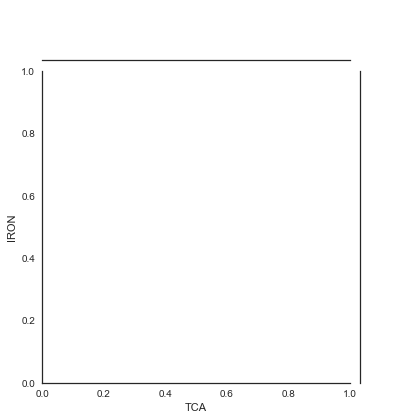

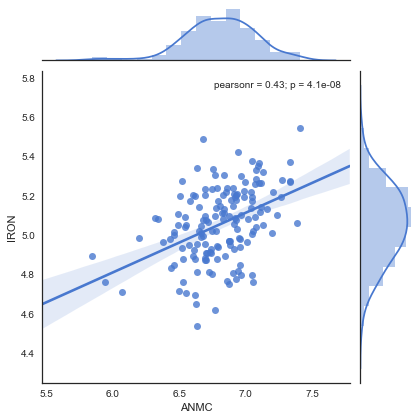

In [344]:
sns.jointplot(df_MU_STR.ANMC, df_MU_STR.IRON, kind = 'reg')

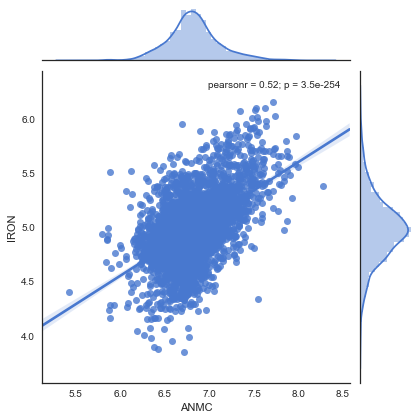

In [345]:
sns.jointplot(df_MU.ANMC, df_MU.IRON, kind = 'reg')

In [335]:
print len(df_MU_CAUD)
print len(df_MU_PUTA)
print len(df_MU_PALL)
print len(df_MU_BG)
print len(df_MU_STR)


91
62
39
192
153


In [336]:
91+62

153

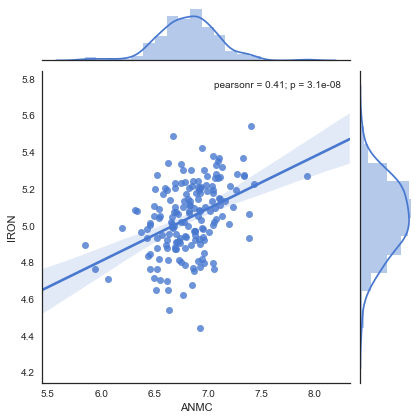

In [319]:
sns.jointplot(df_MU_STR.ANMC, df_MU_STR.IRON, kind = 'reg')

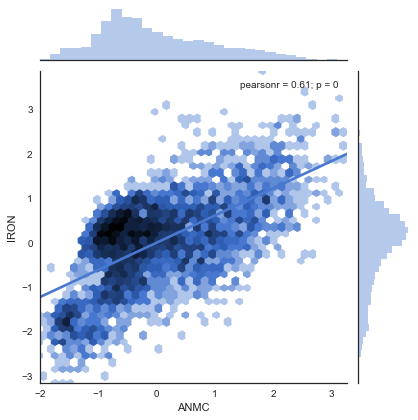

In [294]:
g = sns.jointplot(df_PC2.ANMC, df_PC1.IRON, kind = 'hex',
                  joint_kws={'gridsize':40, 'bins':'log'})
sns.regplot(df_PC2.ANMC, df_PC1.IRON, ax=g.ax_joint, scatter=False, ci=50)

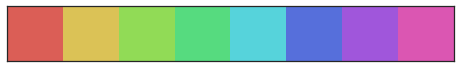

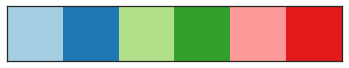

In [60]:
def plot_geneset_correlations(df, met1,met2, cmap, annotate, label, fname):
    grid = sns.JointGrid(met1, met2, data=df) 
    grid.plot_marginals(sns.distplot, color = cmap,hist=False, kde = True, rug = 0, kde_kws={'shade':True})  
    grid.plot_joint(sns.regplot, fit_reg=1, scatter= 1, color = cmap, 
                    line_kws={'linestyle': '-', 'lw':2.5}, scatter_kws={"s": 25})

    formula = [ '%s ~ %s'%(met1
                           ,met2)][0]
    model   = smf.ols(formula=formula, data= df)
    result = model.fit() 
    p_val  = result.pvalues[1]
    pcor   = math.copysign(np.round(np.sqrt(result.rsquared), 3) , result.params[1])
    
    print p_val, pcor
    #xy = (0.015,0.019)
    #xy = (1.2,2.0)
    #if annotate:
    #    plt.annotate('R=%s, P=%s' %(pcor, p_val), xy = annotate, fontsize = 13,  color='r')
    #grid.set_axis_labels()
    
    if label:
        plt.xlabel(label[0], fontsize = 15, weight = 'bold')
        plt.ylabel(label[1], fontsize = 15, weight = 'bold')
        
    plt.xticks(fontsize=12, weight='bold')
    plt.yticks(fontsize=12, weight='bold')
    
    #if fname:
    #    plt.savefig(os.path.join(save_fig_dir, fname), dpi = 500, bbox_inches='tight', transparent = 1, )
    return result

sns.palplot(sns.color_palette("hls", 8))
sns.palplot(sns.color_palette("Paired"))

blue = sns.color_palette("Paired")[1]
green = sns.color_palette("Paired")[3]
red = sns.color_palette("Paired")[5]
purp = sns.color_palette("hls", 8)[6]
purp2 = sns.color_palette("hls", 8)[7]

# Whole Brain - Mean calculated across all-genes all probes

0.0 0.811
2.62129218579e-223 0.49
3.49543424436e-254 0.519


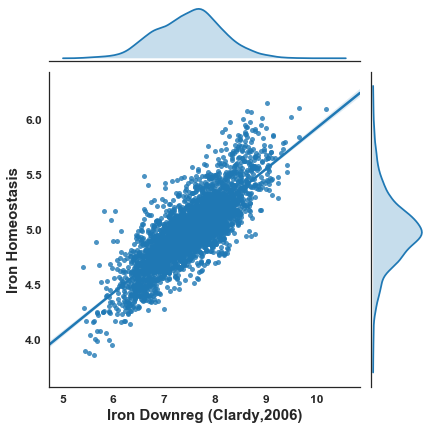

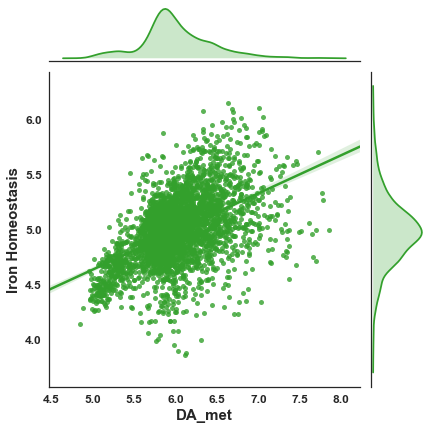

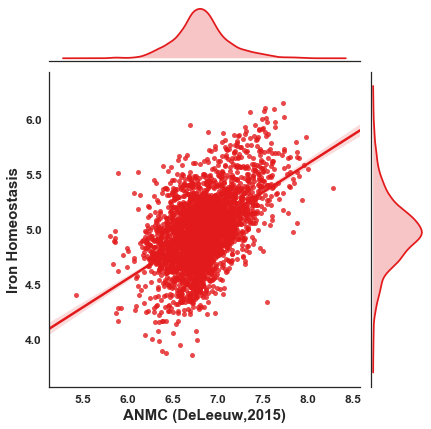

In [61]:
df = df_MU
plot_geneset_correlations(df, 'IRON_D','IRON', cmap = blue, annotate= (500,625), 
                         label = ['Iron Downreg (Clardy,2006)', 'Iron Homeostasis'], fname = 0)
plot_geneset_correlations(df, 'DA_met','IRON', cmap = green, annotate= (800,625),
                          label = ['DA_met', 'Iron Homeostasis'], fname = 0)
plot_geneset_correlations(df, 'ANMC','IRON', cmap = red, annotate=  (525,625), 
                          label = ['ANMC (DeLeeuw,2015)', 'Iron Homeostasis'], fname = 0)

In [ ]:
plot_geneset_correlations(df, 'ANMC','IRON_D', cmap = purp2, annotate=  (1.3,2.05), 
                          label = ['ANMC', 'Iron_D'], fname = 0)

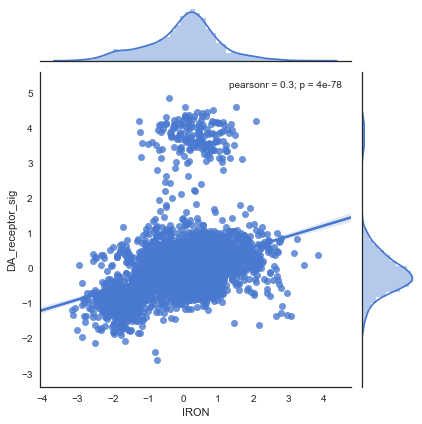

In [119]:
dfx = df_PC1
sns.jointplot(dfx.IRON, dfx.DA_receptor_sig, kind = 'reg')

# Subcortical 


In [191]:
all_structures_small = set(df.struct.values)

def extract_struct_expression(df, roi, all_structures_small):
    drop_structs = [i for i in all_structures_small if roi not in i]
    df_roi = df[~df['struct'].isin(drop_structs)]
    return df_roi

df = df_MU

df_sn   = extract_struct_expression(df, 'substantia', all_structures_small)
df_rn   = extract_struct_expression(df, 'red', all_structures_small)
df_stn  = extract_struct_expression(df, 'subthalamic', all_structures_small)
df_caud = extract_struct_expression(df, 'caudate', all_structures_small)
df_pall = extract_struct_expression(df, 'pallidus', all_structures_small)
df_puta = extract_struct_expression(df, 'putamen', all_structures_small)
df_bg = pd.concat([df_sn,df_rn,df_stn,df_caud,df_pall,df_puta] )
df_subcortical = pd.concat([df_caud,df_pall,df_puta] )
#df_subcortical.to_csv(os.path.join(ahba_dir,'AHBA_subcortical.csv'))



5.51560281115e-35 0.743
2.05513507556e-29 0.698


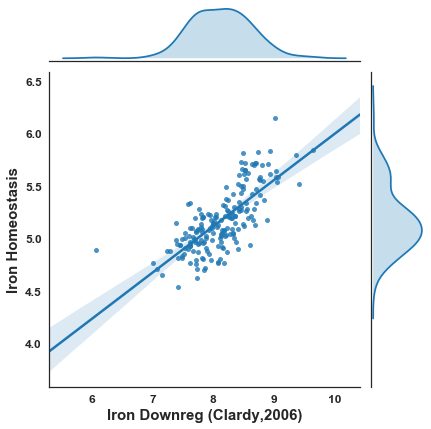

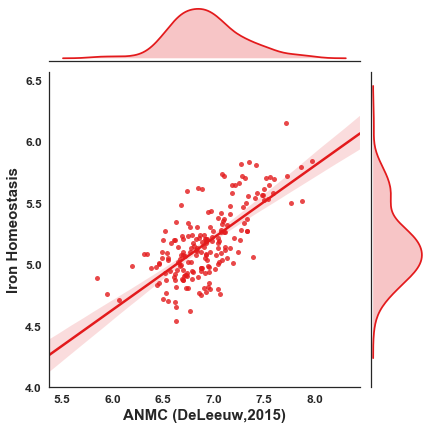

In [126]:
xy = (550,600)

plot_geneset_correlations(df_subcortical, 'IRON_D','IRON', cmap = blue, annotate= (500,625), 
                         label = ['Iron Downreg (Clardy,2006)', 'Iron Homeostasis'], fname = 0)
plot_geneset_correlations(df_subcortical, 'ANMC','IRON', cmap = red, annotate=  (600,650), 
                          label = ['ANMC (DeLeeuw,2015)', 'Iron Homeostasis'], fname = 0)


In [193]:
df = df_PC1

df_caud = extract_struct_expression(df, 'caudate', all_structures_small)
df_pall = extract_struct_expression(df, 'pallidus', all_structures_small)
df_puta = extract_struct_expression(df, 'putamen', all_structures_small)
df_bg = pd.concat([df_caud,df_pall,df_puta] )

# PERUMTATIONS 

In [224]:
def make_permutation(df1, df2, met1,met2, GS1,GS2, df_all, num_permutations, color):
    
    r_val = np.round(pearsonr(df1[met1], df2[met2])[0],3)
    print 'Correlation between %s and %s = %s' %(met1,met2,r_val)

    print 'Number of Genes in %s = %s' %(met1, len(GS1))
    print 'Number of Genes in %s = %s' %(met2, len(GS2))
    geneset_length = len(GS2)
    print 'Taking %s genes random sampling' %(geneset_length)
    print ''
    
    ###############
    genes_all = df_all.drop(drop_strings + GS1 + GS2, axis =1).columns
    print 'Number of total genes =',len(genes_all)
    
    null_distribution = []
    for i in xrange(num_permutations):
        genes_rand = random.sample(genes_all, geneset_length)
        df_rand = df_all.drop(drop_strings + GS1 +GS2 + [i for i in genes_all if i not in genes_rand], axis =1)
        #print df_rand
        #df_rand['EXPRESSION_GS2']  = df[met1].mean(axis =1)
        df_rand['MEAN_rand'] = df_rand[genes_rand].mean(axis =1)
        df_rand['MEAN_GS2']  = df[met2]#.mean(axis =1)
        r_val_null = np.round(pearsonr(df_rand['MEAN_rand'], df_rand['MEAN_GS2'])[0],3)
        null_distribution.append(r_val_null)
        
    # plot
    sns.set(style="white", palette="muted", color_codes=True)
    sns.distplot(null_distribution, hist=False, color=color, kde_kws={"shade": True})
    plt.axvspan(np.percentile(null_distribution, 2.5), 
                np.percentile(null_distribution, 97.5), alpha=0.5, color='lightgray')
    plt.axvline(np.mean(null_distribution), color='k', linestyle='solid')
    plt.axvline(np.mean(r_val), color='k', linestyle='dashed')
    sns.despine(left=True)
    plt.yticks([])
    #plt.xlim(-0.6,0.6)
  

In [221]:
df = df_PC1

df_caud = extract_struct_expression(df, 'caudate', all_structures_small)
df_pall = extract_struct_expression(df, 'pallidus', all_structures_small)
df_puta = extract_struct_expression(df, 'putamen', all_structures_small)
df_bg1 = pd.concat([df_caud,df_pall,df_puta] )

df = df_PC2

df_caud = extract_struct_expression(df, 'caudate', all_structures_small)
df_pall = extract_struct_expression(df, 'pallidus', all_structures_small)
df_puta = extract_struct_expression(df, 'putamen', all_structures_small)
df_bg2 = pd.concat([df_caud,df_pall,df_puta] )

df = df_MU

df_caud = extract_struct_expression(df, 'caudate', all_structures_small)
df_pall = extract_struct_expression(df, 'pallidus', all_structures_small)
df_puta = extract_struct_expression(df, 'putamen', all_structures_small)
df_bgm = pd.concat([df_caud,df_pall,df_puta] )

Correlation between IRON and ANMC = 0.762
Number of Genes in IRON = 12
Number of Genes in ANMC = 33
Taking 33 genes random sampling

Number of total genes = 14951


/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


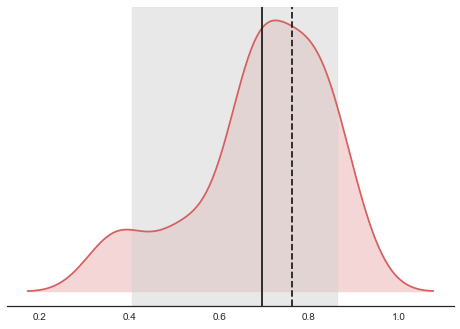

In [225]:
make_permutation(df_bg1,df_bg2, 'IRON', 'ANMC', GS_IRON, GS_ANMC, ahba_all_bg, 10, 'r')


Correlation between ANMC and IRON_D = 0.686
Number of Genes in ANMC = 33
Number of Genes in IRON_D = 17
Taking 17 genes random sampling

Number of total genes = 14945


/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


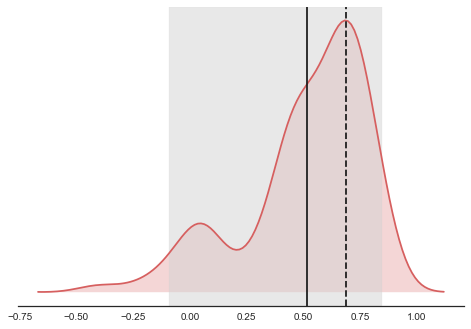

In [238]:
make_permutation(df_bg2,df_bg1,'ANMC', 'IRON_D',  GS_ANMC, GS_IRON_D,  ahba_all_bg, 100, 'r')

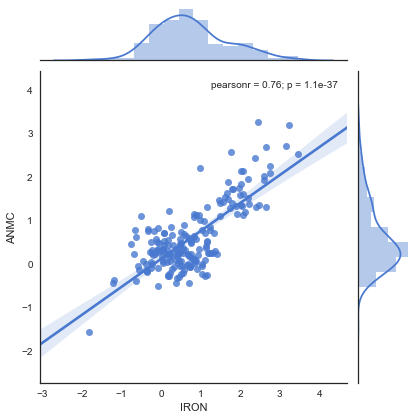

In [234]:
sns.jointplot(df_bg1.IRON, df_bg2.ANMC, kind ='reg')